## 勾配降下法によるcurvefittingの係数決定

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def SGD(eps=1e-10, learning_rate = 1e-3,max_loop=1000, itr='plot', fig='plot'):
    '''
    f(x) = x + a*(x+2)*2 + b*(x+3)**3とする。
    
   勾配降下法で最適パラメータを算出
   勾配降下法：損失関数を最小化するパラメータを推定すること
   
   step1 パラメータの初期値を設定
   step2　パラメータ初期値付近で損失関数を偏微分する
   step3　微分値からパラメータを更新する
   step4　更新前後のパラメータの差分が微小量の場合は、学習を終える
   step5　差分が大きい場合は、繰り返しパラメータを更新する
   step6　学習を指定回数終えても、収束しない場合は最終結果を返す
    '''
    # 学習データ
    x = np.linspace(1,5,100)
    
    # 最適パラメータを得たい関数
    def func_f(w):
        return x + w[0]*(x-3)**3 + w[1]*np.log(x)
    
    def Loss(w):
        return np.sum((y_list - func_f(w))**2)
    
    def dLoss_dw(w):
        w_a = [(w[0]+eps),w[1]]
        w_b = [w[0],(w[1]+eps)]
        
        dLoss_da = (Loss(w_a) - Loss(w))/eps
        dLoss_db = (Loss(w_b) - Loss(w))/eps
        
        return np.array([dLoss_da, dLoss_db])
    
    # 正解データの用意
    a_correct = 18
    b_correct = -50
    w_correct = [a_correct, b_correct]
    y_list = np.array(func_f(w_correct))
    
    a0 = 1
    b0 = 2
    w0 = np.array([a0, b0])
    
    Loss_list = []
    for itr in range(max_loop):
        w1 = w0 - learning_rate*dLoss_dw(w0)
        Loss_list.append(Loss(w1))
        
        w0 = w1
        
    # 予測値を算出
    y_pred = func_f(w0)
    
    
    fig= plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    ax1.scatter( [i for i in range(max_loop)], Loss_list,s=10)
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('Loss')
        
    ax2.scatter(y_list, y_pred)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Estimated')
    
    return Loss_list, w0 , y_pred, y_list
        

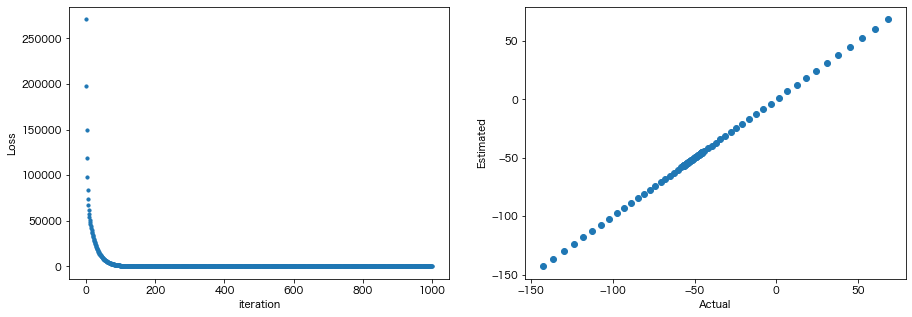

In [3]:
result = SGD()

In [4]:
result[1]

array([ 18., -50.])

In [5]:
import pandas as pd
pd.DataFrame([result[2],result[3]]).T

,0,1
0,-143.000000,-143.000000
1,-136.387901,-136.387901
2,-130.045832,-130.045832
3,-123.972208,-123.972208
4,-118.164859,-118.164859
...,...,...
95,37.845207,37.845207
96,45.006850,45.006850
97,52.503169,52.503169
98,60.341231,60.341231
